In [14]:
pip install opencv-python dlib imutils

In [3]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2025-07-13 19:43:26--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 [following]
--2025-07-13 19:43:26--  https://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  28.4MB/s    in 2.2s    

2025-07-13 19:43:29 (28.4 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [4]:
!wget https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg -O face.jpg


--2025-07-13 19:43:41--  https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91814 (90K) [image/jpeg]
Saving to: ‘face.jpg’

face.jpg            100%[===================>]  89.66K  --.-KB/s    in 0.02s   

2025-07-13 19:43:41 (3.63 MB/s) - ‘face.jpg’ saved [91814/91814]



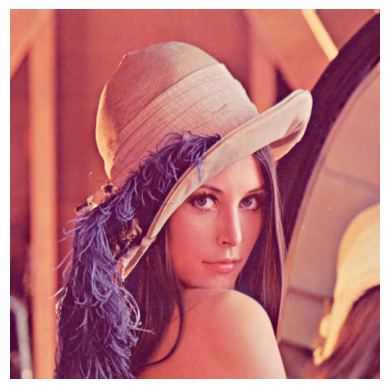

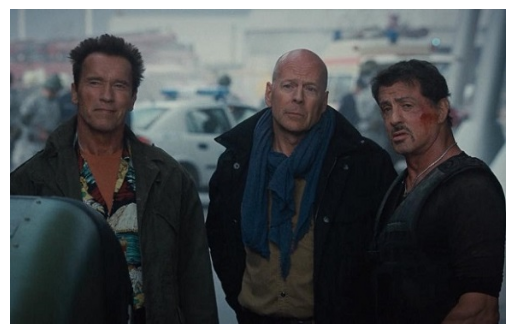

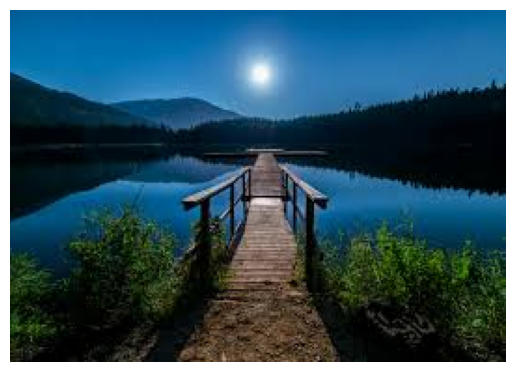

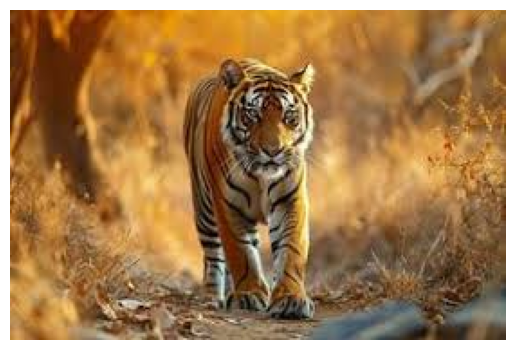

In [6]:
import matplotlib.pyplot as plt
from skimage.io import imread

im = imread('face.jpg')
plt.imshow(im)
plt.axis('off')
plt.show()
im = imread('face_multiple.jpg')
plt.imshow(im)
plt.axis('off')
plt.show()
im = imread('nature.jpeg')
plt.imshow(im)
plt.axis('off')
plt.show()
im = imread('tiger.jpeg')
plt.imshow(im)
plt.axis('off')
plt.show()

In [18]:
import cv2
import os
import numpy as np
import dlib
import pandas as pd

def extract_face_colors(image_path, predictor_path="shape_predictor_68_face_landmarks.dat"):
    if not os.path.isfile(image_path):
        print("Error: Image file not found.")
        return

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Invalid or unreadable image.")
        return

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    try:
        detector = dlib.get_frontal_face_detector()
        predictor = dlib.shape_predictor(predictor_path)
    except RuntimeError as e:
        print(f"Error loading dlib models: {e}")
        return

    faces = detector(gray)

    if len(faces) == 0:
        # print("Error: No face detected in the image.")
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(5, 5))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.title(f"No face detected")
        plt.show()
        return

    all_color_data = []

    for face_id, face in enumerate(faces):
        landmarks = predictor(gray, face)
        points = {
            "left_eye_corner": (landmarks.part(36).x, landmarks.part(36).y),
            "right_eye_corner": (landmarks.part(45).x, landmarks.part(45).y),
            "nose_tip": (landmarks.part(30).x, landmarks.part(30).y)
        }

        for region, (x, y) in points.items():
            if 0 <= x < image.shape[1] and 0 <= y < image.shape[0]:
                b, g, r = image[y, x]
                all_color_data.append({
                    "face_id": face_id,
                    "region": region,
                    "x": x,
                    "y": y,
                    "R": int(r),
                    "G": int(g),
                    "B": int(b)
                })

                # Annotate image
                cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
                cv2.putText(image, f"{region.rsplit('_', 1)[0]}_{face_id}", (x+5, y+5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
            else:
                print(f"Warning: Point {region} for face {face_id} is out of bounds.")

    if not all_color_data:
        print("Error: No valid points extracted.")
        return

    # Save CSV
    df = pd.DataFrame(all_color_data)
    csv_path = f"{image_path.rsplit('.', 1)[0]}.csv"
    df.to_csv(csv_path, index=False)
    print(f"CSV saved: {csv_path}")

    # Visualize image with all face points
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Detected {len(faces)} face(s)")
    plt.show()

    print(df)


CSV saved: face.csv


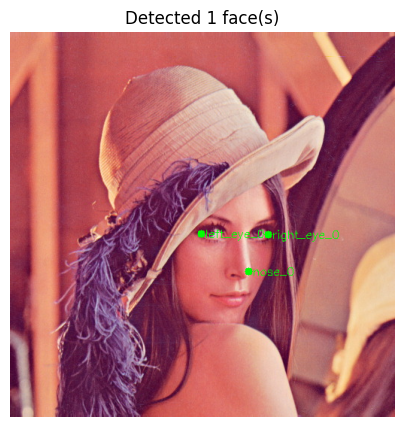

   face_id            region    x    y    R    G    B
0        0   left_eye_corner  254  268  137   33   60
1        0  right_eye_corner  343  269  127   32   64
2        0          nose_tip  317  318  249  221  197


In [19]:
extract_face_colors("face.jpg")

CSV saved: face_multiple.csv


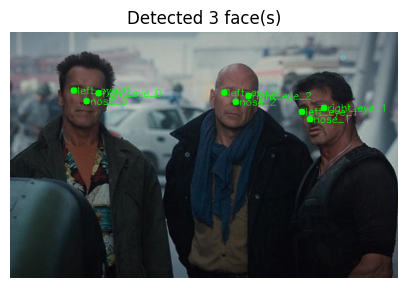

   face_id            region    x    y    R    G   B
0        0   left_eye_corner   95   87   61   45  45
1        0  right_eye_corner  132   91   52   36  36
2        0          nose_tip  114  103  114   90  90
3        1   left_eye_corner  436  119   39   29  30
4        1  right_eye_corner  469  113   57   42  37
5        1          nose_tip  448  130  116   89  82
6        2   left_eye_corner  320   90   58   42  42
7        2  right_eye_corner  356   95    0  255   0
8        2          nose_tip  337  104  119   95  95


In [20]:
extract_face_colors("face_multiple.jpg")

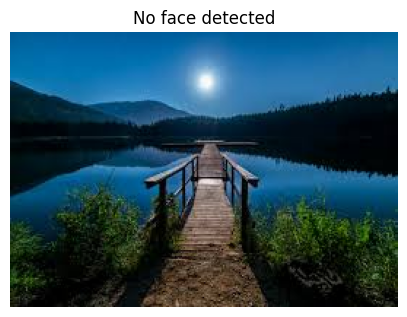

In [21]:
extract_face_colors("nature.jpeg")

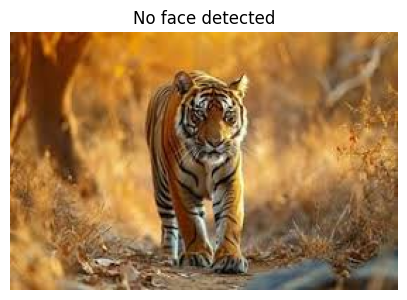

In [22]:
extract_face_colors("tiger.jpeg")